This first part is only needed as we have to mock VASP here as we cannot run it directly in a jupyter notebook:

In [12]:
from mock_vasp import TEST_DIR, mock_vasp

ref_paths = {
        "phonon static 1/1": "Si_phonons_2/phonon_static_1_1",
        "static": "Si_phonons_2/static",
    }

Now, we load a structure and other important functions and classes for running the phonon workflow.

In [13]:
from pymatgen.core import Structure
from atomate2.vasp.flows.phonons import PhononMaker
from jobflow import run_locally, JobStore
from maggma.stores import MemoryStore

job_store = JobStore(MemoryStore(), additional_stores={"data": MemoryStore()})
si_structure = Structure.from_file(TEST_DIR / "structures" / "Si.cif")


Then one can use the `PhononMaker` to generate a `Flow`. For testing here, we are choosing a very small supercell length (`min_length`). Ideally, a larger cell should be chosen. For non-metallic systems with more than one element, one might need to add the non-analytical term correction by considering `BORN` charges with the `born_maker`. Of course, the structure should also be relaxed in advance with the `bulk_relax_maker`. This is not done here for simplicity.

In [14]:
flow=PhononMaker(
        min_length=3.0,
        bulk_relax_maker=None,
        born_maker=None,
        use_symmetrized_structure="conventional",
        create_thermal_displacements=False,
        store_force_constants=False,
        prefer_90_degrees=False,
        generate_frequencies_eigenvectors_kwargs={"tstep": 100},
    ).make(si_structure)

The phonon run will first perform a bulk relaxation, then the displacements are generated and run. As we currently don’t have a way to compute BORN charges with such potentials, a non-analytical term correction is not performed here. We can visualize the flow first.

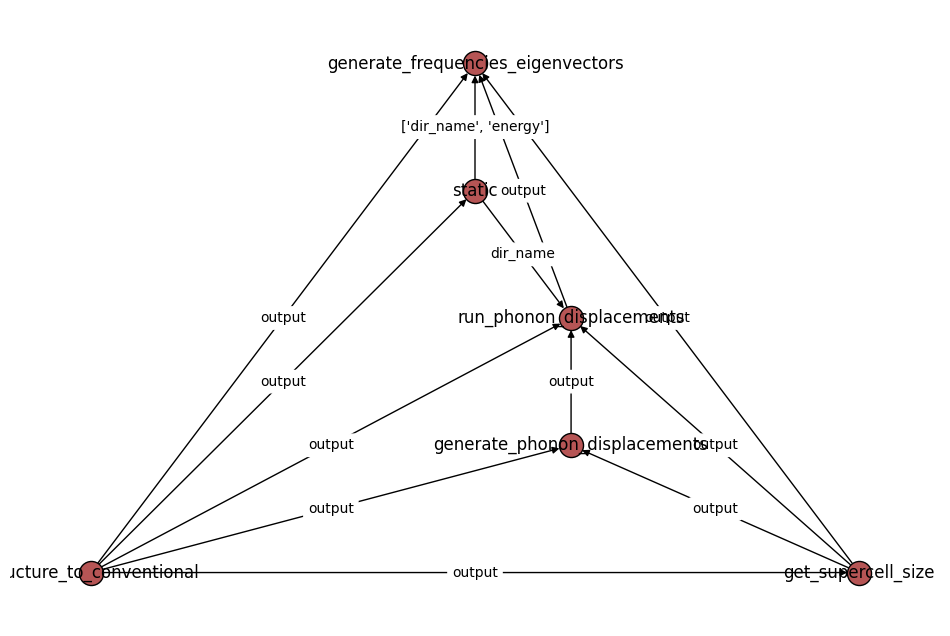

In [15]:
flow.draw_graph().show()

We now run the flow with  `run_locally`. We mock the run here. Normally, you would simply use `run_locally` without the `with mock_vasp`

In [16]:
with mock_vasp(ref_paths=ref_paths) as mf:
    run_locally(flow, create_folders=True,
        ensure_success=True,
        raise_immediately=True,
                store=job_store)

2025-02-07 21:06:54,971 INFO Started executing jobs locally
2025-02-07 21:06:54,974 INFO Starting job - structure_to_conventional (e580b1ee-85ab-48a6-b816-a3b9a1019fb0)
2025-02-07 21:06:54,986 INFO Finished job - structure_to_conventional (e580b1ee-85ab-48a6-b816-a3b9a1019fb0)
2025-02-07 21:06:54,987 INFO Starting job - get_supercell_size (d14a6d0f-618d-4c14-9167-98b332061252)
2025-02-07 21:06:54,990 INFO Finished job - get_supercell_size (d14a6d0f-618d-4c14-9167-98b332061252)
2025-02-07 21:06:54,991 INFO Starting job - static (1cb5d5de-3168-4a94-915c-e177c5b482f1)
2025-02-07 21:06:55,178 INFO Finished job - static (1cb5d5de-3168-4a94-915c-e177c5b482f1)
2025-02-07 21:06:55,179 WARNING Response.stored_data is not supported with local manager.
2025-02-07 21:06:55,180 INFO Starting job - generate_phonon_displacements (ddc72302-3d27-4a16-91ca-9e6430f81c1a)
2025-02-07 21:06:55,229 INFO Finished job - generate_phonon_displacements (ddc72302-3d27-4a16-91ca-9e6430f81c1a)
2025-02-07 21:06:55,22

/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-07 21:06:55,336 INFO Finished job - run_phonon_displacements (90815b96-01b1-4a4b-beb5-3bef9aa0242f)
2025-02-07 21:06:55,339 INFO Starting job - phonon static 1/1 (a2f4b416-548e-4671-b5ea-fe93d999d489)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpl354ftgh/job_2025-02-07-20-06-55-339042-56749/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-07 21:06:56,219 INFO Finished job - phonon static 1/1 (a2f4b416-548e-4671-b5ea-fe93d999d489)
2025-02-07 21:06:56,220 WARNING Response.stored_data is not supported with local manager.
2025-02-07 21:06:56,221 INFO Starting job - store_inputs (90815b96-01b1-4a4b-beb5-3bef9aa0242f, 2)
2025-02-07 21:06:56,222 INFO Finished job - store_inputs (90815b96-01b1-4a4b-beb5-3bef9aa0242f, 2)
2025-02-07 21:06:56,223 INFO Starting job - generate_frequencies_eigenvectors (b6a6c784-b333-47ea-ab91-74b46373cfb9)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribut

2025-02-07 21:07:02,169 INFO Finished job - generate_frequencies_eigenvectors (b6a6c784-b333-47ea-ab91-74b46373cfb9)
2025-02-07 21:07:02,170 INFO Finished executing jobs locally


In [17]:
from pymatgen.phonon.bandstructure import PhononBandStructureSymmLine
from pymatgen.phonon.dos import PhononDos
from pymatgen.phonon.plotter import PhononBSPlotter, PhononDosPlotter
from jobflow import SETTINGS

job_store.connect()

result = job_store.query_one(
    {"name": "generate_frequencies_eigenvectors"},
    properties=[
        "output.phonon_dos",
        "output.phonon_bandstructure",
    ],
    load=True,
    sort={"completed_at": -1} # to get the latest computation
)

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{Frequencies\\ (THz)}$'>

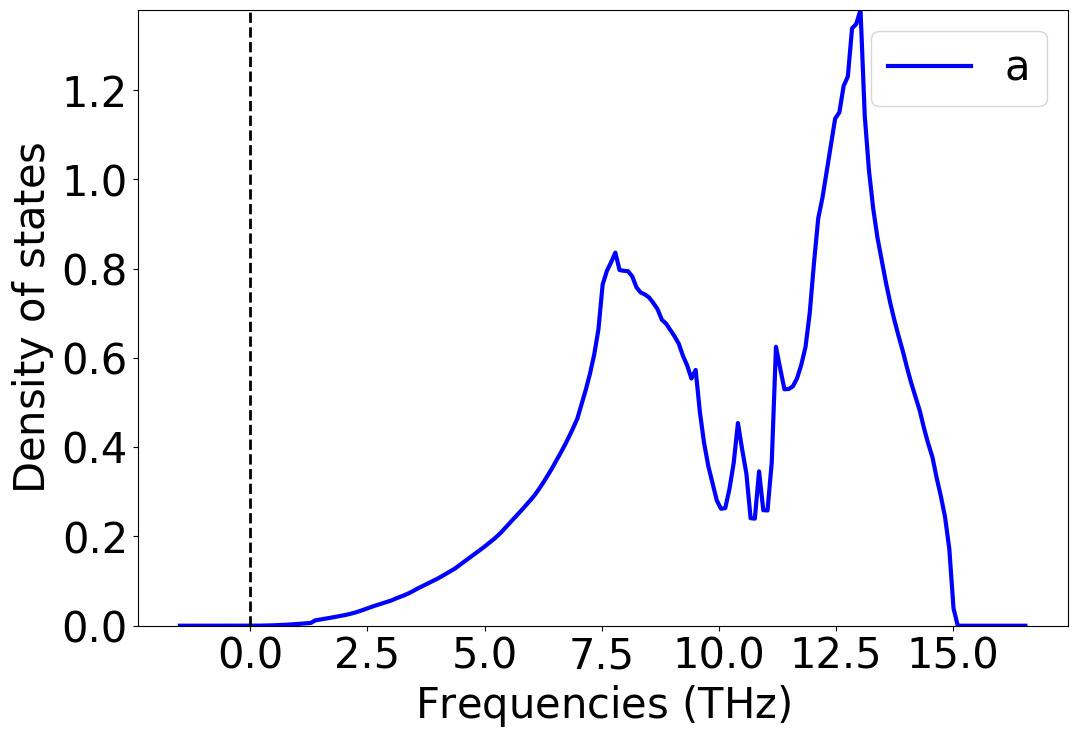

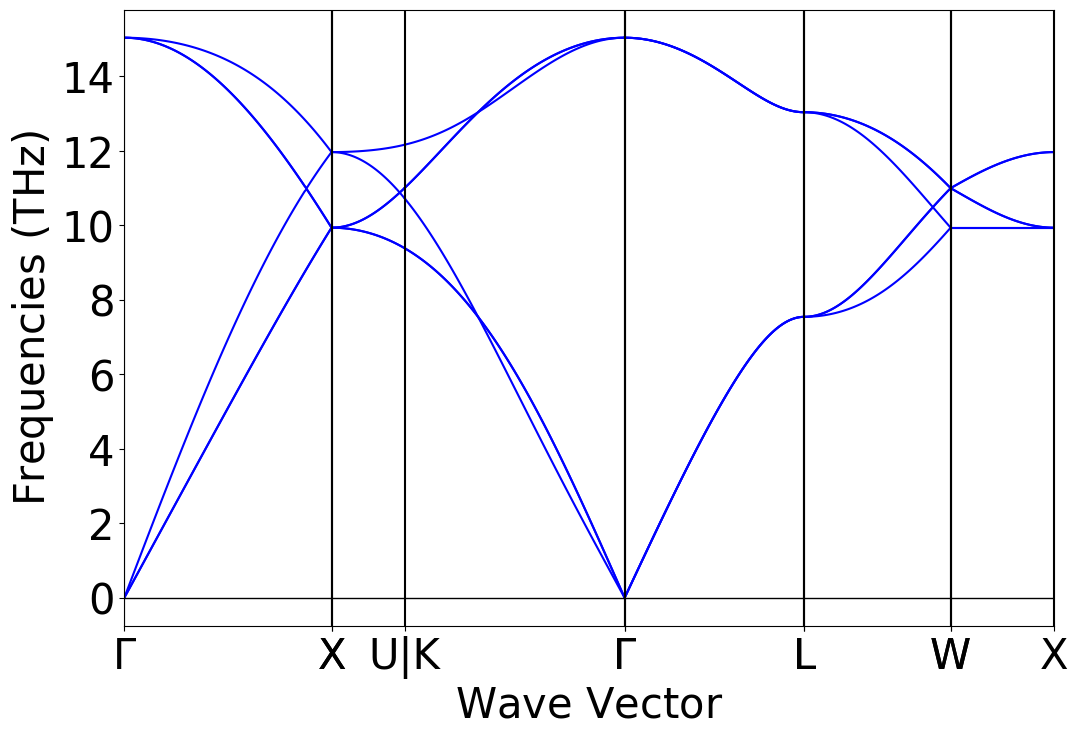

In [18]:
ph_bs = PhononBandStructureSymmLine.from_dict(result['output']['phonon_bandstructure']) # get pymatgen bandstructure object
ph_dos = PhononDos.from_dict(result['output']['phonon_dos']) # get pymatgen phonon dos object

# initialize dos plotter and visualize dos plot
dos_plot = PhononDosPlotter()
dos_plot.add_dos(label='a', dos=ph_dos)
dos_plot.get_plot()

# initialize Phonon bandstructure plotter and visualize band structure plot
bs_plot = PhononBSPlotter(bs=ph_bs)
bs_plot.get_plot()

One can run the same workflow with a forcefield as well. Here, we cannot consider BORN charges yet as there is no forcefield equivalent.

In [19]:
from atomate2.forcefields.flows.phonons import PhononMaker
flow=PhononMaker(
        min_length=3.0,
        born_maker=None,
        use_symmetrized_structure="conventional",
        create_thermal_displacements=False,
        store_force_constants=False,
        prefer_90_degrees=False,
        generate_frequencies_eigenvectors_kwargs={"tstep": 100},
    ).make(si_structure)
run_locally(flow, store=job_store,create_folders=True, raise_immediately=True)

2025-02-07 21:07:02,623 INFO Started executing jobs locally
2025-02-07 21:07:02,627 INFO Starting job - structure_to_conventional (ee0c83c8-d4f0-4d8d-8773-c6b5a9e126e4)
2025-02-07 21:07:02,639 INFO Finished job - structure_to_conventional (ee0c83c8-d4f0-4d8d-8773-c6b5a9e126e4)
2025-02-07 21:07:02,643 INFO Starting job - Force field relax (993e9aa0-14d0-4066-b8e3-316499801914)


ModuleNotFoundError: No module named 'torch'

It is possible to switch to another force field as well!

In [ ]:
from atomate2.forcefields.jobs import ForceFieldRelaxMaker, ForceFieldStaticMaker
flow=PhononMaker(
        min_length=3.0,
        bulk_relax_maker=None,
        use_symmetrized_structure="conventional",
        create_thermal_displacements=False,
        store_force_constants=False,
        prefer_90_degrees=False,
        generate_frequencies_eigenvectors_kwargs={"tstep": 100},
        bulk_makre=ForceFieldRelaxMaker(force_field_name="MACE"),
        static_energy_maker=ForceFieldStaticMaker(force_field_name="MACE"),
        phonon_displacement_maker=ForceFieldStaticMaker(force_field_name="MACE")).make(si_structure)

run_locally(flow, store=job_store,create_folders=True, raise_immediately=True)